# Homolytic Cleavage of the C-F Bond

In this exercise, you will investigate the influence of correlation on
the BDE in a radical process by comparing Hartree-Fock to MPn results.
Consider the reaction enthalpy of the homolytic cleavage of the H$_3$C-F
bond in monofluoro methane: 

$$
\begin{aligned}
CH_3F \quad \rightarrow \quad H_3C\cdot \quad + \quad F\cdot\end{aligned}
$$


As in the exercise on hydrogen dissociation, you may calculate the bond
dissociation energy as the difference of the energy of the fragments:


$$
\begin{aligned}
E^{BDE} =  E^{H_3C\cdot} + E^{F\cdot} - E^{CH_3F}.\end{aligned}
$$

Experimentally, $E^{BDE}$ for this process was determined to be 109.2 kcal mol$^{-1}$ ([*J. Phys. Chem. A*, **2000**, 104, *436*](https://pubs.acs.org/doi/10.1021/jp002317r)).

Bond dissociation energies of large systems often require the use of
large basis sets of triple-$\zeta$ quality; you may either use Pople's
6-311+G\* basis, or the larger aug-cc-pVTZ by Dunning and coworkers (the
choice is up to you; either will take comparably long). As Post-HF
methods require orbitals that diagonalise the Fock operator (*i.e.* the
Hartree-Fock orbitals), the HF orbitals will need to be calculated at
the start of every run.

The Post-HF treatment itself may take some considerable time. It is
therefore not advisable to run electronic structure calculations with
computationally expensive methods starting from a random guess for the
geometry (since this guess may be considerably off the equilibrium). It
is usually more effective to pre-optimise the geometry at the Hartree-Fock level, and only then carry out the more elaborate calculations on the basis of the converged Hartree-Fock result.

In Psi4 this is easy as the geometry is automatically updated when calling `psi4.optimize()`.  In other electronic structure programs often checkpoint files are written which contain intermediate states of the geometry and/or wavefunction. 

For MP3 and MP4, one often expects the geometry not to change too much
anymore, and a reasonable estimate for the energy may already be given
by a single-point calculation on the optimised MP2 geometry.

In general, it is sometimes necessary to optimise the geometry at a
lower Post-Hartree-Fock level, followed by a higher level single point
calculation. This is due to a lack of available analytical gradients for
certain higher order methods (such as MP4), which causes the
computational time for a geometry optimisation to become exorbitantly
high.

:::{admonition} Exercise 2
:class: exercise 
Perform the calculations below and complete the following table.

 |Method:         |   HF   | MP2  |  MP3  |          Exp.          |
 | :--------------| :----: | :--- | :---- |  :-------------------- |
 |$E^{F\cdot}$    |        |      |       |        n/a             |
 |$E^{H_3C\cdot}$ |        |      |       |        n/a             |
 |$E^{CH_3F}$     |        |      |       |        n/a             |
 |$E^{BDE}$       |        |      |       |  109.2 kcal mol$^{-1}$ |
:::

In [1]:
import psi4
import py3Dmol
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from helpers import *

In [2]:
psi4.set_num_threads(2)
psi4.set_memory('2 GB')

  Threads set to 2 by Python driver.

  Memory set to   1.863 GiB by Python driver.


2000000000

In [3]:
# setup dictionary to store results in
energies = {'hf':{
                 'ch3f':None,
                 'ch3':None,
                 'f':None
                },
            'mp2':{
                 'ch3f':None,
                 'ch3':None,
                 'f':None
                },
            'mp3':{
                 'ch3f':None,
                 'ch3':None,
                 'f':None
                },
           }

### CH3F molecule

In [4]:
ch3f = psi4.geometry("""
0 1
symmetry c1
    F           -0.642381967195     0.000000095800    -0.000000000108
    C            0.742340417015    -0.000000119001     0.000000000132
    H            1.090184715481    -1.027287458657     0.000000000131
    H            1.090184841794     0.513643534810    -0.889656896780
    H            1.090184842203     0.513643534859     0.889656897127
""")

In [5]:
drawXYZ(ch3f)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
psi4.core.set_output_file('ch3f.log', False)

In [7]:
psi4.set_options({'reference':'uhf'}) 
energies['hf']['ch3f'] = psi4.optimize('hf/aug-cc-pvdz')

Optimizer: Optimization complete!


In [8]:
psi4.set_options({"reference" :"uhf","mp2_type":"conv"})
energies['mp2']['ch3f']  = psi4.optimize('mp2/aug-cc-pvdz')

Optimizer: Optimization complete!


:::{admonition} Exercise 3
:class: exercise 
Why is it a reasonable choice to use Hartree-Fock geometries and
    wavefunctions as a starting point for optimisations at the
    Post-Hartree-Fock level? What is the advantage and how is this
    approach justified?
:::

In [9]:
energies['mp3']['ch3f'] = psi4.energy('mp3/aug-cc-pvdz')

:::{admonition} Exercise 4
:class: exercise 
Why do you think it is reasonable to choose not to carry out a geometry optimisation for mp3?
:::

In [32]:
drawXYZ(ch3f)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### CH3&middot; radical

In [11]:
psi4.core.clean_options()
psi4.core.clean()

In [34]:
ch3_radical = psi4.geometry("""
0 2
symmetry c1
C        0.749   0.000   0.000
H        1.112   0.000   1.028
H        1.112  -0.890  -0.514
H        1.112   0.890  -0.514
""")

In [35]:
drawXYZ(ch3_radical)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
psi4.core.set_output_file(f'ch3_radical.log', False)

In [15]:
psi4.set_options({"reference" :"uhf","guess":"gwh", "opt_coordinates": "both"})
energies['hf']['ch3'] = psi4.optimize('hf/aug-cc-pvdz', molecule=ch3_radical)

Optimizer: Optimization complete!


In [16]:
psi4.set_options({"reference" :"uhf","guess":"gwh", "mp2_type":"conv", "opt_coordinates": "both"})
energies['mp2']['ch3'] = psi4.optimize('mp2/aug-cc-pvdz', molecule=ch3_radical)

Optimizer: Optimization complete!


In [17]:
energies['mp3']['ch3'] = psi4.energy('mp3/aug-cc-pvdz', molecule=ch3_radical)

In [33]:
drawXYZ(ch3_radical)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### F &middot; radical

In [19]:
psi4.core.clean_options()
psi4.core.clean()

In [20]:
f_radical = psi4.geometry("""
0 2
symmetry c1
F       -0.650  -0.000   0.000
""")

In [36]:
drawXYZ(f_radical)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
psi4.core.set_output_file(f'f_radical.log', False)

In [23]:
psi4.set_options({"reference" :"uhf", "guess":"gwh"})
energies['hf']['f'] = psi4.optimize('hf/aug-cc-pvdz')

Optimizer: Optimization complete!


In [24]:
psi4.set_options({"reference" :"uhf","guess":"gwh", "mp2_type":"conv", "opt_coordinates": "both"})
energies['mp2']['f'] = psi4.optimize('mp2/aug-cc-pvdz')

Optimizer: Optimization complete!


In [25]:
energies['mp3']['f'] = psi4.energy('mp3/aug-cc-pvdz')

### BDE

Now that we performed all the calculations required, it is finally possible to compute the BDE for the reaction.

In [26]:
# calculate the BDE energies here and convert them to kcal/mol 
# You can use psi4.constants.hartree2kcalmol for the unit conversion

energies['hf']['bde'] = None # 
energies['mp2']['bde'] = None # 
energies['mp3']['bde'] = None # 


In [28]:
pd.DataFrame.from_dict(energies)

,hf,mp2,mp3
ch3f,-139.057552,-139.422653,-139.436920
ch3,-39.565801,-39.700946,-39.720405
f,-99.381098,-99.537740,-99.547730
bde,69.435602,115.440743,105.914646


:::{admonition} Exercise 5
:class: exercise 
Is the homolytic cleavage of the H$_3$C-F bond likely, based on the
    BDE that you calculated? (Think of radical processes in general.)
:::

:::{admonition} Exercise 6
:class: exercise 
What is the trend in energies when moving from HF over MP2 to MP3 for your calculations? Does this series converge? Do you expect the same trend for higher order MPn methods? Why? 

*Hint*: You can check the convergence for MP2 and MP3 by running the code cell below.
:::

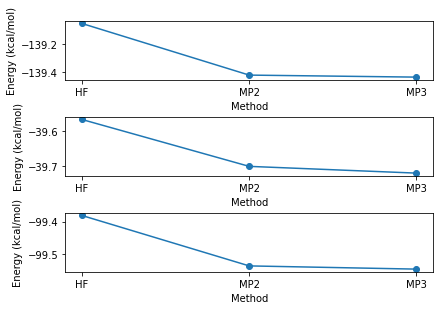

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,constrained_layout = True)

ax1.plot([1,2,3],[energies['hf']['ch3f'],energies['mp2']['ch3f'],energies['mp3']['ch3f']],'o-')
ax1.set_xlabel('Method')
ax1.set_ylabel('Energy (kcal/mol)')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['HF', 'MP2', 'MP3'])

ax2.plot([1,2,3],[energies['hf']['ch3'],energies['mp2']['ch3'],energies['mp3']['ch3']],'o-')
ax2.set_xlabel('Method')
ax2.set_ylabel('Energy (kcal/mol)')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['HF', 'MP2', 'MP3'])

ax3.plot([1,2,3],[energies['hf']['f'],energies['mp2']['f'],energies['mp3']['f']],'o-')
ax3.set_xlabel('Method')
ax3.set_ylabel('Energy (kcal/mol)')
ax3.set_xticks([1, 2, 3])
ax3.set_xticklabels(['HF', 'MP2', 'MP3'])

#plt.gcf().set_dpi(300)
plt.show()

:::{admonition} Exercise 7
:class: exercise 
Comment on the accuracy of the HF approach for this system. If the
    difference between HF and MPn is large, how is the use of MPn still
    justified? (*Hint*: Think in terms of the scale of the absolute energy
    of the system, rather than the reaction.)
:::